In [1]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading The DataSet.
airlines=pd.read_csv('EastWestAirlines.csv')

# EDA

In [3]:
airlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [4]:
airlines.tail()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

In [5]:
airlines.shape

(3999, 12)

In [6]:
# Checking Null Values.
airlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
# Checking Duplicate values.
airlines[airlines.duplicated()].sum()

ID#                  0.0
Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award?               0.0
dtype: float64

In [8]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
airlines.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [10]:
# Droping The Unwanted Features.
airlines2=airlines.drop(['ID#'],axis=1)

In [12]:
airlines2


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [13]:
#minmax=MinMaxScaler()
#minmax_df=minmax.fit_transform(airlines2)
#minmax_df
#The goal of normalization is to transform features to be on a similar scale.
#This improves the performance and training stability of the model.
from sklearn.preprocessing import normalize
airline2_norm=pd.DataFrame(normalize(airlines2),columns=airlines2.columns)
airline2_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.970414         0.0   0.000034   0.000034   0.000034     0.006000   
1     0.940209         0.0   0.000049   0.000049   0.000049     0.010504   
2     0.981113         0.0   0.000024   0.000024   0.000024     0.097817   
3     0.904428         0.0   0.000061   0.000061   0.000061     0.030605   
4     0.912226         0.0   0.000037   0.000009   0.000009     0.404078   
...        ...         ...        ...        ...        ...          ...   
3994  0.905810         0.0   0.000049   0.000049   0.000049     0.417949   
3995  0.999649         0.0   0.000016   0.000016   0.000016     0.015231   
3996  0.944948         0.0   0.000039   0.000013   0.000013     0.326726   
3997  0.999592         0.0   0.000018   0.000018   0.000018     0.009104   
3998  0.907271         0.0   0.000301   0.000301   0.000301     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.000034           0.000000         0.000000           0.241371   
1        0.000098           0.000000         0.000000           0.340437   
2        0.000095           0.000000         0.000000           0.166880   
3        0.000061           0.000000         0.000000           0.425527   
4        0.000243           0.019383         0.000037           0.064718   
...           ...                ...              ...                ...   
3994     0.000196           0.009805         0.000049           0.068784   
3995     0.000078           0.000000         0.000000           0.021659   
3996     0.000103           0.000000         0.000000           0.018001   
3997     0.000018           0.009104         0.000018           0.025509   
3998     0.000000           0.000000         0.000000           0.420546   

        Award?  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.000009  
...        ...  
3994  0.000049  
3995  0.000016  
3996  0.000013  
3997  0.000000  
3998  0.000000  

[3999 rows x 11 columns]

# 1.Hierarchical Clustering
Hierarchical clustering is an unsupervised learning technique used to group similar objects into clusters. It creates a hierarchy of clusters by merging or splitting them based on similarity measures.

Hierarchical clustering groups similar objects into a dendrogram. It merges similar clusters iteratively, starting with each data point as a separate cluster. This creates a tree-like structure that shows the relationships between clusters and their hierarchy.



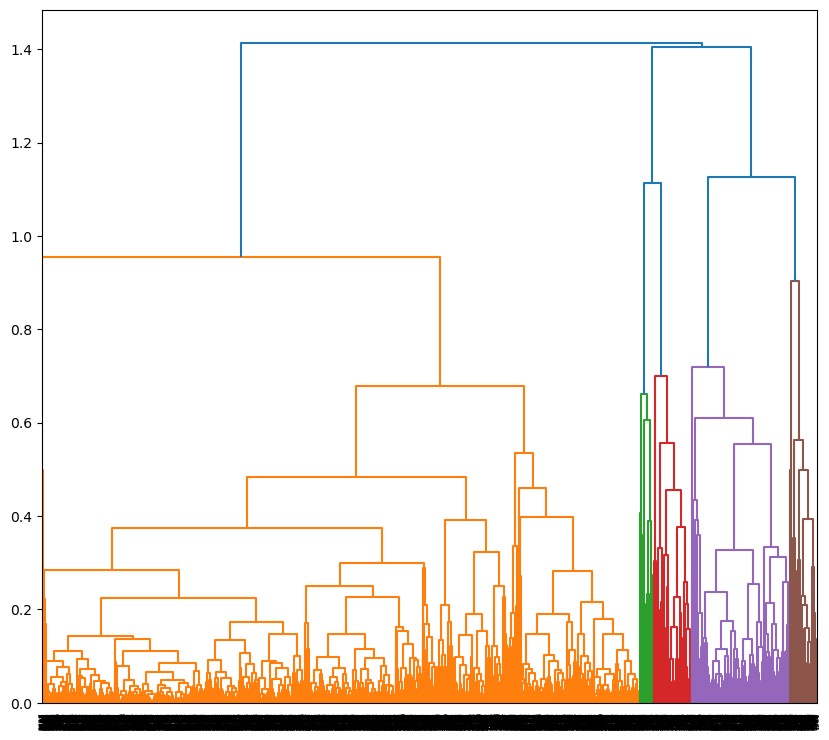

In [14]:

# A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. 
# The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.
plt.figure(figsize=(10, 9))
dendrogram=sch.dendrogram(sch.linkage(airline2_norm,method='complete'))

In [15]:
# We assign each point to an individual cluster in this technique. Suppose there are 4 data points. 
# We will assign each of these points to a cluster and hence will have 4 clusters in the beginning.and Final it has only one cluster.
from sklearn.cluster import AgglomerativeClustering
airline_data=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [16]:
# Initialize The Model.
airline_data.fit(airline2_norm)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [17]:
# Saving The Clusters For The Chart.
# Getting How many Clusters Each Data Point Have.
airline_data_1=airline_data.fit_predict(airline2_norm)

In [18]:
airline_data_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
airline_data_1.shape

(3999,)

In [20]:
# Adding The H_Clusters To the DataFrame.
airlines['h_clusters']=airline_data_1

In [21]:
airlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   h_clusters  
0           0  
1           0  
2           0  
3           0  
4           0

In [22]:
airlines.tail()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  h_clusters  
3994       1           0  
3995       1           0  
3996       1           0  
3997       0           0  
3998       0           0

In [23]:
# Sorting The Clusters In Ascending Order.
airlines_clus=airlines.sort_values('h_clusters')
airlines_clus.iloc[:,[0,-1]]

ID#  h_clusters
0        1           0
2522  2541           0
2523  2542           0
2526  2545           0
2527  2546           0
...    ...         ...
1368  1381           4
1363  1376           4
408    414           4
1387  1401           4
559    566           4

[3999 rows x 2 columns]

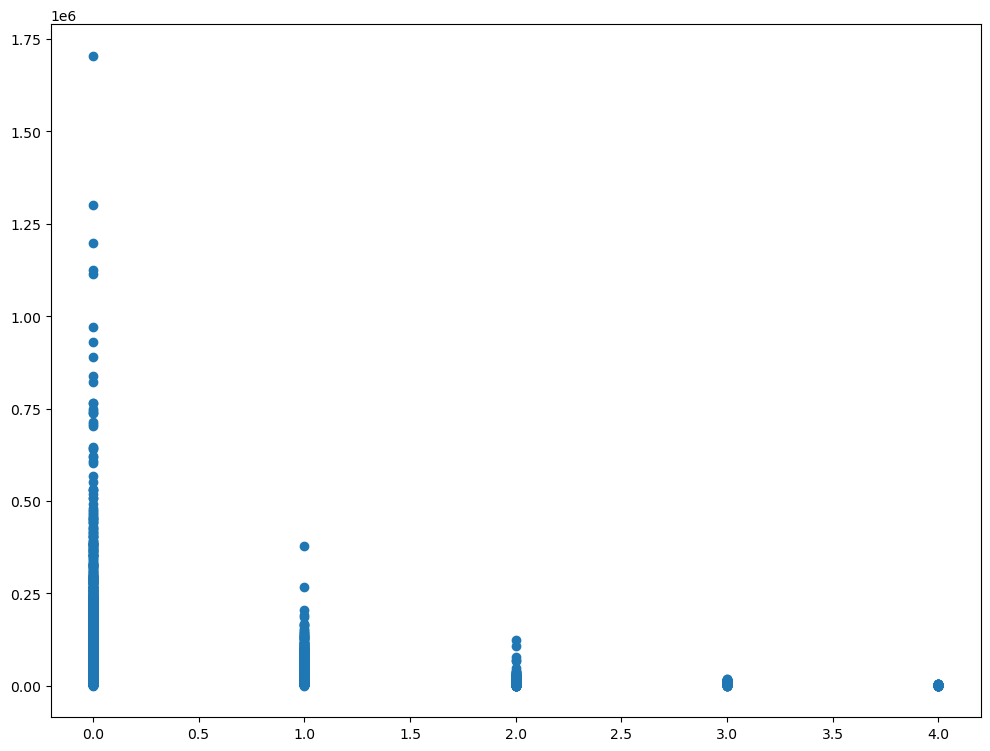

In [24]:
# Ploting the Clusters.
plt.figure(figsize=(12,9))
plt.scatter(airlines['h_clusters'],airlines['Balance'])
plt.show()

In [26]:
airlines['h_clusters'].value_counts()

0    3086
1     509
3     197
2     137
4      70
Name: h_clusters, dtype: int64

# 2.KMeans Clustering

The k-means clustering algorithm is an Iterative algorithm that divides a group of n datasets into k different clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.

Implementation of the K-Means Algorithm
The implementation and working of the K-Means algorithm are explained in the steps below:

Step 1: Select the value of K to decide the number of clusters (n_clusters) to be formed.

Step 2: Select random K points that will act as cluster centroids (cluster_centers).

Step 3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid, which will form the predefined clusters.

Step 4: Place a new centroid of each cluster.

Step 5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.

Step 6: If any reassignment occurs, then go to step 4; else, go to step 7.

Step 7: Finish



In [27]:
airlines=pd.read_csv('EastWestAirlines.csv')

In [28]:
airlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [29]:
airlines.tail()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

In [30]:
# Standardize The Given DataSet.
scaler=StandardScaler()
scaled_airlines_df=scaler.fit_transform(airlines.iloc[:,1:])
scaled_airlines_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

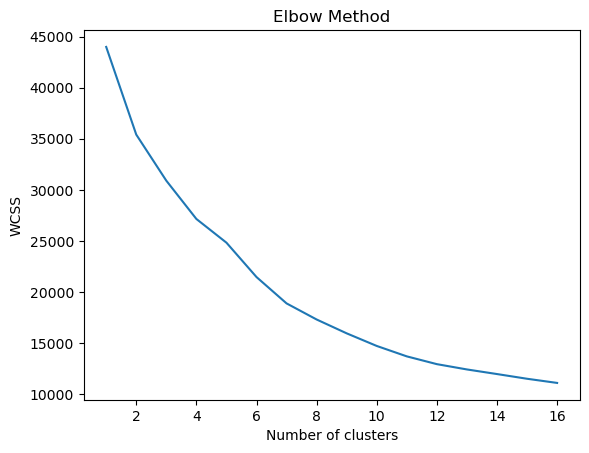

In [31]:
# WCSS Means Within Cluster-Sum OF Squares.
# To Find The Best value Of K(Optimal Numberf OF Clusters) We Use Elbo Curve Method.
# We can choose the right number of clusters with the help of the Within-Cluster-Sum-of-Squares (WCSS) method. 
# WCSS stands for the sum of the squares of distances of the data points in each and every cluster from its centroid.
# The main idea is to minimize the distance (e.g., euclidean distance) between the data points and the centroid of the clusters.
# The process is iterated until we reach a minimum value for the sum of distances.
# Inertia measures how well a dataset was clustered by K-Means.
# A good model is one with low inertia AND a low number of clusters ( K ).

wcss = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airlines_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 17), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# Initialize The Model.
airlines_new = KMeans(7, random_state=42)
airlines_new.fit(scaled_airlines_df)

KMeans(n_clusters=7, random_state=42)

In [33]:
airlines_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [34]:
airlines['clusterid_new'] = airlines_new.labels_

In [35]:
airlines


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusterid_new  
0          0              1  
1          0              1  
2          0              1  
3          0              1  
4          1              4  
...      ...            ...  
3994       1              0  
3995       1              0  
3996       1              0  
3997       0              1  
3998       0              1  

[3999 rows x 13 columns]

In [36]:
airlines.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new          ID#        Balance   Qual_miles cc1_miles cc2_miles  \
                        mean           mean         mean      mean      mean   
0             0  1964.306832   57704.306832    99.578882  1.686957  1.000000   
1             1  2271.356555   43394.246734    32.247218  1.311079  1.000000   
2             2  1695.655738  199014.459016   520.221311  2.385246  1.000000   
3             3  1664.866667  138061.400000    78.800000  3.466667  1.000000   
4             4  1496.696970  137393.728395    56.991021  4.108866  1.000000   
5             5  2269.372093   68876.581395    23.255814  1.139535  2.348837   
6             6  2109.267857  115243.642857  5590.535714  2.053571  1.000000   

  cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
       mean          mean        mean              mean            mean   
0  1.000000  10543.357764   10.575155        424.853416        1.304348   
1  1.000484   4784.531688    7.176101        159.905660        0.479439   
2  1.000000  36582.278689   29.844262       6137.696721       17.696721   
3  4.066667  93927.866667   28.066667        506.666667        1.600000   
4  1.002245  47802.755331   19.689113        373.414141        1.138047   
5  1.000000  14689.837209   17.534884        582.627907        2.209302   
6  1.000000  19452.428571   12.339286        947.625000        2.857143   

  Days_since_enroll    Award?  
               mean      mean  
0       4228.881988  1.000000  
1       3635.080310  0.000000  
2       4762.639344  0.819672  
3       4613.866667  0.533333  
4       5065.318743  0.585859  
5       3968.930233  0.395349  
6       3893.660714  0.517857

In [37]:
# The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
predict=kmeans.fit_predict(scaled_airlines_df)

In [39]:
predict

array([ 1,  1,  1, ...,  0, 14, 14])

In [40]:
silhouette_score_average = silhouette_score(scaled_airlines_df, predict)

In [41]:
silhouette_score_average

0.27569486291648443

# 3.DBSCAN(Density-based spatial clustering of applications with noise)

K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.


In [49]:
airlines=pd.read_csv('EastWestAirlines.csv')

In [50]:
airlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [51]:
airlines.tail()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

In [52]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [53]:
airlines.shape

(3999, 12)

In [54]:
airlines.drop(['ID#'],axis=1,inplace=True)

In [55]:
airlines


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [56]:
scaler=StandardScaler()
X=scaler.fit_transform(airlines)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [57]:
# To Know The Optimal value of Epesilon we can use K-Distance Graph.
# The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)


In [58]:
distances, indices

(array([[0.        , 0.11184685],
        [0.        , 0.11406276],
        [0.        , 0.16540223],
        ...,
        [0.        , 0.16614779],
        [0.        , 0.25725534],
        [0.        , 0.00270574]]),
 array([[   0,  378],
        [   1,    3],
        [   2,  338],
        ...,
        [3996, 3877],
        [3997, 3623],
        [3998, 3491]], dtype=int64))

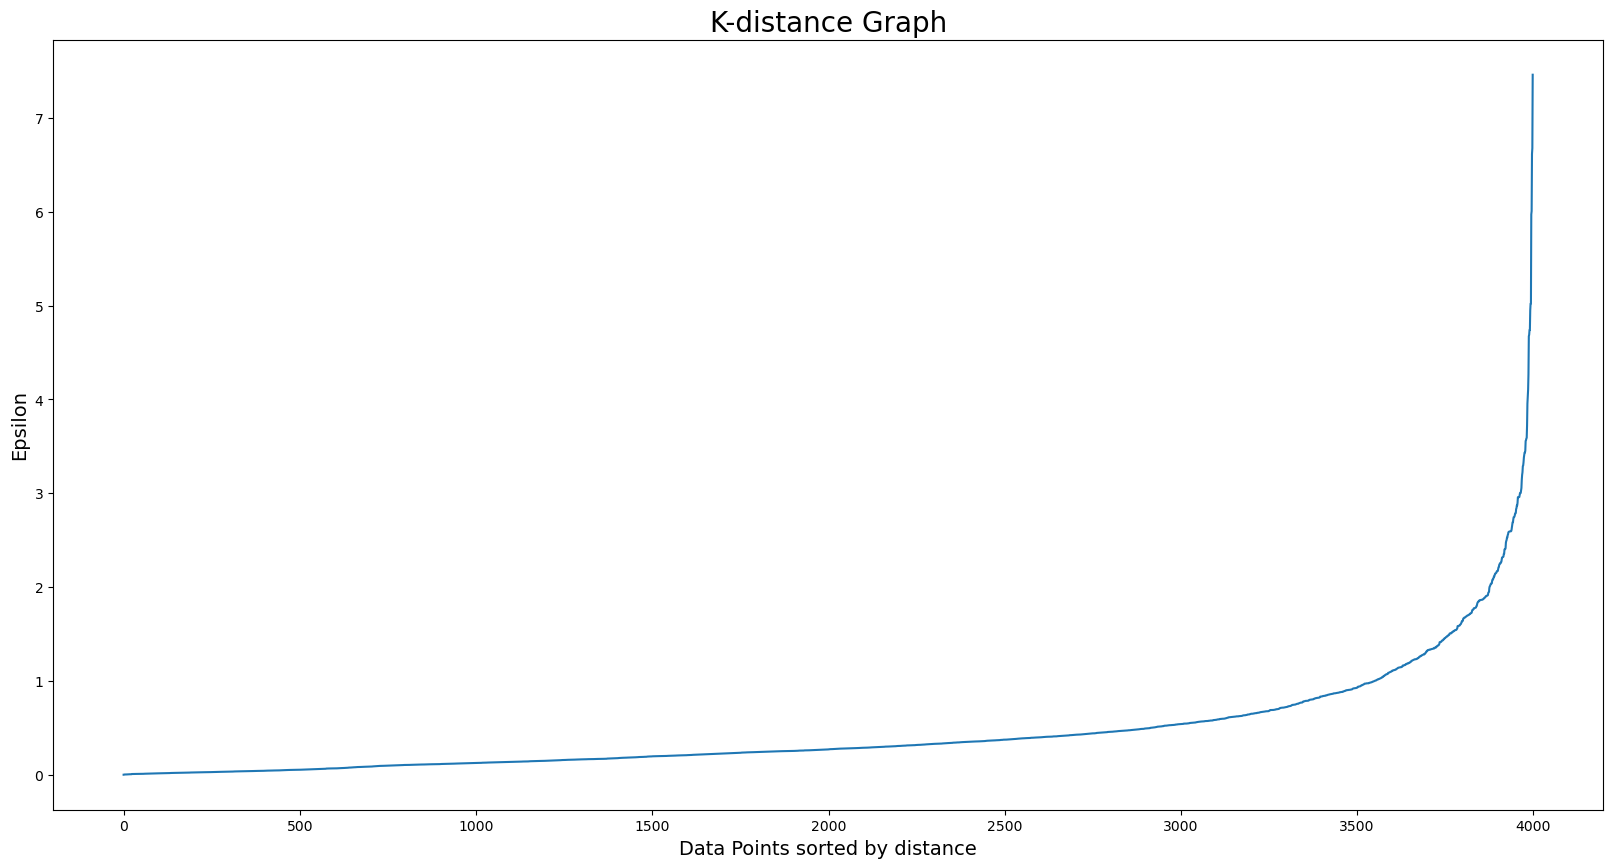

In [59]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


In [60]:
# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 2.
dbscan = DBSCAN(eps=2, min_samples=4)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [62]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

cluster
0           0
1           0
2           0
3           0
4           1
...       ...
3994        1
3995        1
3996        1
3997        0
3998        0

[3999 rows x 1 columns]

In [63]:
clustered = pd.concat([airlines,cl],axis=1)
clustered

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  cluster  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          1        1  
...      ...      ...  
3994       1        1  
3995       1        1  
3996       1        1  
3997       0        0  
3998       0        0  

[3999 rows x 12 columns]

In [64]:
# Outlier Detection.
# The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 and 2 etc are the different clusters, and -1 is the noise.
clustered[clustered['cluster']==-1]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
70      84409        5031          2          1          1        15436   
87     609477           0          3          1          1        21422   
...       ...         ...        ...        ...        ...          ...   
3846    97510        1678          5          1          1        71609   
3883   126167           0          5          1          1       190160   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
50              5               6368                5               6844   
65             45               5550               29               6826   
70             16               1150                4               7766   
87             22               1200                8               6820   
...           ...                ...              ...                ...   
3846           51               7650               26               1665   
3883           15                  0                0               1612   
3911           19               4104               16               1552   
3917           37               6349                7               1545   
3934            2               9577                1               1515   

      Award?  cluster  
8          1       -1  
50         0       -1  
65         1       -1  
70         0       -1  
87         0       -1  
...      ...      ...  
3846       1       -1  
3883       1       -1  
3911       0       -1  
3917       0       -1  
3934       0       -1  

[167 rows x 12 columns]

In [65]:
clustered['cluster'].value_counts()

 0    2453
 1    1334
-1     167
 3      16
 2       9
 5       7
 6       5
 4       4
 7       4
Name: cluster, dtype: int64